<a href="https://colab.research.google.com/github/alice202122/AI_PROJECT/blob/main/AI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CONNECT TO DRIVE

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/AI_in_medicine/final_project

/content/drive/MyDrive/AI_in_medicine/final_project


In [4]:
!unzip training_set.zip

Archive:  training_set.zip
replace S001_128.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: S001_128.mat            
  inflating: S001_128_ann.mat        
  inflating: S001_128_rpk.mat        
  inflating: S002_128.mat            
  inflating: S002_128_ann.mat        
 extracting: S002_128_rpk.mat        
  inflating: S003_128.mat            
  inflating: S003_128_ann.mat        
  inflating: S003_128_rpk.mat        
  inflating: S004_128.mat            
  inflating: S004_128_ann.mat        
 extracting: S004_128_rpk.mat        
  inflating: S005_128.mat            
  inflating: S005_128_ann.mat        
  inflating: S005_128_rpk.mat        
  inflating: S006_128.mat            
  inflating: S006_128_ann.mat        
  inflating: S006_128_rpk.mat        
  inflating: S007_128.mat            
  inflating: S007_128_ann.mat        
 extracting: S007_128_rpk.mat        
  inflating: S008_128.mat            
  inflating: S008_128_ann.mat        
 extracting: S008_128_rpk.mat        

# IMPORTING LIBRARIES

In [5]:
from scipy.io import loadmat
import numpy as np, os
from numpy import array, matrix, multiply
import ntpath

In [69]:
def get_labels(anns):
  classes = list()
  for array in anns: 
    for filename in array:    
      classes.append(filename)
  return classes

#DATA LOADING

In [6]:
input_directory = '/content/drive/MyDrive/AI_in_medicine/final_project'

In [7]:
patients = []
recordings = []
for f in os.listdir(input_directory):
  g = ntpath.basename(f) #it takes the name of the file inside the dataset
  g = os.path.splitext(g)[0] #it removes the extension of the file (.mat)
  if g.startswith('S') and g[-1].isdigit(): #it takes the name of the file starting from S ad ending in a number(ecg info)
    patients.append(g) #it adds all these file in the list header
    mat_file = g + '.mat' #it adds the .mat extension 
    x = loadmat(mat_file) #we access to the ecg recording 
    recording = np.asarray(x['ecg'], dtype=np.float64)
    recordings.append(recording)
num_files = len(patients)

In [8]:
rpks = []
for f in os.listdir(input_directory):
  g = ntpath.basename(f)
  g = os.path.splitext(g)[0]
  if g.startswith('S') and g.endswith('k'): 
    mat_file = g + '.mat'
    x = loadmat(mat_file)
    rpk = np.asarray(x['rpeaks'])
    rpks.append(rpk)

In [9]:
anns = []
for f in os.listdir(input_directory):
  g = ntpath.basename(f)
  g = os.path.splitext(g)[0]
  if g.startswith('S') and g.endswith('n'):
    mat_file = g + '.mat'
    x = loadmat(mat_file)
    ann = np.asarray(x['labels'])
    anns.append(ann)

In [18]:
info = []
all_patients =[]
for i in range(num_files):
  info = [ patients[i], recordings[i], rpks[i], anns[i]]
  all_patients.append(info)

In [61]:
for i in anns:
  

array(['N', 'N', 'N', ..., 'N', 'N', 'V'], dtype='<U1')

In [67]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
Normal_sinus = 'N'
PAC= 'S'
PVC = 'V'

# get all labels from the loaded header files 
labels= get_labels(anns)

# Adapt labels into AF or NSR
labels_n = list()
labels_v= list()
labels_s=list()
for label_temp in labels:
  if Normal_sinus in label_temp: 
      labels_n.append('N') 
  elif  PAC in label_temp:
      labels_s.append('S') 
  elif PVC in label_temp:
    labels_v.append('V') 
print(labels_n)
print(labels_s)
print(labels_v)
print(len(labels_n))

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [72]:
#concatenation of the three lists containing the labels
labels_adapt= labels_n+ labels_v + labels_s

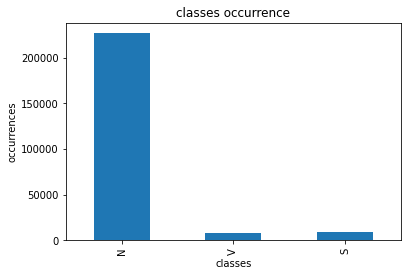

In [74]:
# Create label histogram using Counter and pandas Dataframe 
label_counts = Counter(labels_adapt)

df = pd.DataFrame.from_dict(label_counts, orient='index')
df.plot(kind='bar', legend=False, title='classes occurrence', xlabel='classes', ylabel='occurrences')
plt.show()